### Rescheduled Class
You should all have received an email concerning the 2 rescheduled class.
<br>Rescheduled classes will be held on: 
- 06/26 (June 26, Tuesday ), period 1, room CALL 23 
- 06/29 (June 29, Friday ), period 5, room CALL 23 

You may attend either class. 
<br>The content will be identical. 

__THERE IS A CLASS ON JUNE 25, MONDAY AS USUAL__

## Please download the new class notes.
### Step 1 : Navigate to the directory where your files are stored.  
Open a terminal. 
<br>Using `cd`, navigate to *inside* the ILAS_Python_for_engineers folder on your computer. 
### Step 3 : Update the course notes by downloading the changes
In the terminal type:

>`git add -A
git commit -m "commit"
git fetch upstream
git merge -X theirs upstream/master`


# Rates of Change : Differential Equations

<br> <a href='#SystemsCoupledEquations'>Systems of Coupled Equations</a>
    <br> &emsp;&emsp; <a href='#LinearEquations'>Linear Equations</a> 
        <br> &emsp;&emsp; &emsp;&emsp; <a href='#ExampleElectricalCircuit'>Example: An Electrical Circuit</a> 
    <br> &emsp;&emsp; <a href='#NonLinearEquations'>Linear Equations</a> 
<br> <a href='#RootFinding'>Root Finding</a> 
	<br> &emsp;&emsp; <a href='#IterativeSolutions'>Iterative Solutions</a> 
    <br> &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;<a href='#Bisection'>Bisection</a> 
        <br> &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; <a href='#ExampleBisectionAlgorithm'>Example: Bisection Algorithm</a> 
    <br> &emsp;&emsp;<a href='#ImportingSpecificAlgorithms'>Importing Specific Algorithms </a> 
    <br> &emsp;&emsp; <a href='#FindingnthRootPeriodicFunction'>Finding the nth Root of a Periodic Function</a> 
<br> <a href='#CoupledNonLinearEquations'>Coupled Non-Linear Equations (continued)</a> 
<br> <a href='#Summary'>Summary</a>
<br> <a href='#TestYourselfExercises'>Test-Yourself Exercises</a>


### Lesson Goal



### Fundamental programming concepts


Many of the practical situations that engineers have to analyse involve quantities that change with respect to time or another parameter. 

Examples:
 - Temperature of a substance/system
 - Signal voltage
 - Torque on a turbine blade

The calculus techniques that we use to solve these problems are 
- differentiation
- integration

You will probably be familiar with all of the techniques we will study today.

The main challenge is knowing how to represent processes that you are familiar with solving manually, using the Python syntax. 



There are multiple ways to solve differentiation and integration problems programmatically.

Today we will study several of these methods using:
- Numpy
- Scipy
- Sympy : A Python library for __symbolic__ mathematics.



In [145]:
import numpy as np
import scipy
import sympy

import matplotlib.pyplot as plt
%matplotlib inline

In the past two seminars we considered functions that can be represented in a 2D coordinate system by considering the relation ship between:
- input (independent variable) 
- output (dependent variable)

For example, a function, $f(t)$

<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 

The definition of the function $f(t)$ at a point $t$:
    
$$ f' = \lim_{x \to 0} \frac{f(t + \Delta t)-f(t)}{\Delta t} = \lim_{x \to 0} \frac{\Delta f}{\Delta t}$$

where $\Delta f$ is the rate of change of $f(t)$ corresponding to a chnage $\Delta t$ in $t$ 

This from this definition, we can *approximate* the rate of change of function $f(t)$ with respect to parameter $t$, from the difference in $f$ between two different values of $t$.

<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 

Forward difference:
    
$$ f' \approx \frac{f(t + h)-f(t)}{h} $$

Backward difference:

$$ f' \approx \frac{f(t)-f(t - h)}{h} $$

Central difference:

$$ f' \approx \frac{f(t + h)-f(t - h)}{2h} $$

## Numerical Derivatives by Difference Methods
If your data points are equally space, these equations are very easy to solve programmatically for a data set.



In [42]:
def forward_diff(x, y):
    #all_but_last = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    all_but_last = np.diff(y) / np.diff(x)
    # solve last element by backward difference
    last = (y[-1] - y[-2]) / (x[-1] - x[-2])
    return(np.append(all_but_last, last))


def backward_diff(x, y):
    #all_but_first = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    all_but_first = np.diff(y) / np.diff(x)
    # solve fisrst element by forward difference
    first = (y[1] - y[0]) / (x[1] - x[0])
    return(np.insert(all_but_first, 0, first))


def central_diff(x, y):
    centre = (y[2:] - y[:-2]) / (x[2:] - x[:-2])
    # solve first and last element 
    first = (y[1] - y[0]) / (x[1] - x[0])
    last = (y[-1] - y[-2]) / (x[-1] - x[-2])
    
    return(np.insert(np.append(centre, last), 0, first))

This gives a very simple method for solving numerical derivatives.

Let's test these functions.

Analytical solution:

$$f(t)=sin(t), \qquad f'(t)=cos(t)$$

<img src="img/sin_cos_diff.png" alt="Drawing" style="width: 200px;"/> 

To show the accuracy of the solution, we first consider a very small t interval.

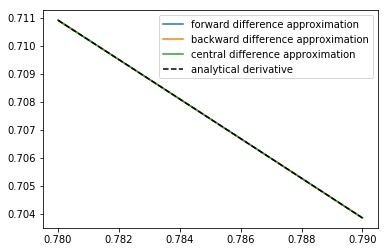

In [46]:
t = np.linspace(0.78,0.79,100)
f = np.sin(t)

dfdt_analytical = np.cos(t)

dfdt_fwd = forward_diff(t, f)
dfdt_bck = backward_diff(t, f)
dfdt_ctr = central_diff(t, f)

plt.plot(t, dfdt_analytical, label='forward difference approximation')
plt.plot(t, dfdt_analytical, label='backward difference approximation')
plt.plot(t, dfdt_analytical, label='central difference approximation')
plt.plot(t, dfdt_analytical, 'k--', label='analytical derivative')
plt.legend();

The solution for a greater t interval:

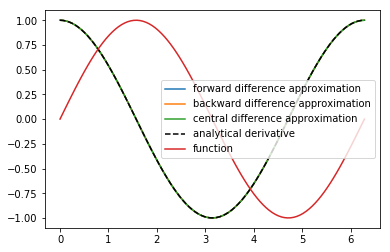

In [53]:
t = np.linspace(0, 2 * np.pi, 100)
f = np.sin(t)

dfdt_analytical = np.cos(t)

dfdt_fwd = forward_diff(t, f)
dfdt_bck = backward_diff(t, f)
dfdt_ctr = central_diff(t, f)

plt.plot(t, dfdt_analytical, label='forward difference approximation')
plt.plot(t, dfdt_analytical, label='backward difference approximation')
plt.plot(t, dfdt_analytical, label='central difference approximation')
plt.plot(t, dfdt_analytical, 'k--', label='analytical derivative')
plt.plot(t, f, label='function')
plt.legend(loc='best');

In computing terms, calculation that use loops are slow.

However, for practical purposes, this is a fast way to approximate the numerical derivative for *smooth* function data.

## Numerical Derivatives by Difference Methods

Some of the functions that we considered in the previous classes we generated by fitting a polynomial curve to empirical (and sometimes noisy) data.

To find the derivative of a polynomial function, we can use the numpy function, `polyder`



Example:
    $$p(x) = x^3 + x^2 + x^1 + 1$$
    
Find $p'(x)$

In [54]:
p = np.poly1d([1,1,1,1])
pd = np.polyder(p)
print(pd)

   2
3 x + 2 x + 1


Find $p'(2)$

In [56]:
pd(2.)

17.0

We can check the solution using the forward/backward/central difference approximation.

Forward difference approximation:

$$ f' \approx \frac{f(x + \Delta x)-f(x)}{\Delta x} $$

let $\Delta x = 0.001$       

In [57]:
pd2 = (p(2. + 0.001) - p(2.)) / 0.001
print(pd2)

17.007000999997857


`polyder` can be be used to solve higher order derivatives by giving a second argument:

In [59]:
# second derivative of p
print(np.polyder(p, 2))

# third derivative of p
print(np.polyder(p, 3))

# fourth derivative of p
print(np.polyder(p, 4))

 
6 x + 2
 
6
 
0


The fourth derivative of a 3rd-order polynomial is zero.

## Piecewise Functions
Occaisionally we need to define piecewise functions e.g.:

$$f(x)=
\begin{cases} 
      0   & ,x < 0 \\
      x   & ,0\leq x \leq 1 \\
      2-x & ,1 < x \leq 2 \\
      x+1 & ,x > 2 
\end{cases}
$$


A simple way to solve this is to use conditional statements.

However, the function is not vectorised (we cannot apply it directly to a data structure).

In [69]:
def f1(x): 
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x 
    elif 1 < x <= 2:
        return 2.0 - x 
    else:
         return x + 1.0

print(f1(-1))

# Application to data structure causes an error
# print(f1([0, 1, 2, 3, 4]))

0


You can get vectorized behavior (apply the function to each element) by looping through each value in the data structure.

This is not ideal e.g. we cannot directly plot or interrogate the function. 

Ideally we want a function where both of the following statements are allowable:

        print(f1([0, 1, 2, 3, 4]))
        print(f1(0))

In seminar 04_AdvancedFunctions_Libraries.ipynb we learnt to use the numpy function `vectorise` to allow a function to accept both single variables and data structures as input arguments.

This is an example of where vectorising a function is really useful.

In [70]:
f2 = np.vectorize(f1)
print(f2([0, 1, 2, 3, 4]))
print(f2(0))

[0 1 0 4 5]
0


The main advantages of vectorization are:
- simplicity of code
- speed

Loops in python are usually very slow compared to vectorized functions.


## Integrating Equations 
A common need in engineering calculations is to __integrate__ an equation over some range to determine the total change. 


For example, find the integral of a function f(x) from a to b i.e.

$$V = \int_{a}^{b} f(x) dx$$


As a specific example, lets find the integrate:
$$y = x^2$$

with respect to $x$,
<br>within the limits $x=0$ to $x=1$. 

\begin{align*}
V &= \int_{0}^{1} x^2 dx\\
  &= \frac{1}{3}x^3 \biggr\rvert_0^{1}\\
  &= \frac{1}{3}(1)^3 - \frac{1}{3}(0)^3\\
  &= \frac{1}{3}
\end{align*}

The scipy function `quad` is very convenient for solving integration problems:

In [ ]:
from scipy.integrate import quad

In [83]:
# create a function to describe the integrand
def integrand(x):
    return x**2

# input arguments : 
# function
# lower limit
# upper limit 
ans, err = quad(integrand, 0, 1)

print(ans)
print(f'The estimated error is {err}')

0.33333333333333337
The estimated error is 3.700743415417189e-15


The change in volumetric flow rate into a tank (with respect to time):

$$ \frac{dv}{dt}=\alpha t $$

where $\alpha = 1\textrm{L/s}$ 

<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 

__How much liquid flows into the tank over 10 minutes?__
<br>Initial flow rate:
<br>$v_0=5\textrm{L/s,} \qquad t=0$

__Solution__

We can see that at 

\begin{align*}
v_1 &= v_0 + \frac{dv}{dt}\\
    &= v_0 + \alpha (1) \\
\end{align*}

i.e.

$$v_n = v_0 + \alpha n$$

<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 

To find the total __volume__ of liquid the enters the tank in $n$ seconds:

$$V = \int_{0}^{n} v_0 + \alpha t \quad dt$$

In [86]:
from scipy.integrate import quad

t0=0.0
tfinal = 10.0
v0=5       # L/s
alpha = 1  # L/s


# create a function to describe the integrand
def integrand(t):
    return v0 + alpha * t


# input arguments : 
# function
# lower limit
# upper limit
V, err = quad(integrand, t0, tfinal)


print(f'{V} L flowed into the tank in 10 seconds')
print(f'The estimated error is {err}')

100.0 L flowed into the tank in 10 seconds
The estimated error is 1.1102230246251565e-12


We can check the solution:
    
\begin{align*}
V &= \int_{0}^{10} v_0 + \alpha t \quad dt\\
  &= v_0(t) + \frac{1}{2}\alpha t^2 \biggr\rvert_0^{10}\\
  &=100
\end{align*}

### Nested Integrals
Sometimes engineering problems require us to integrate an expression multiple times to find the desired solution.

In that case, we can instead use the function:
- `scipy.integrate.dblquad` : double integral
- `scipy.integrate.tplquad` : triple integral
- `scipy.integrate.nquad`   : any number of intergals

In [90]:
from scipy.integrate import dblquad
from scipy.integrate import tplquad
from scipy.integrate import nquad

__Example:__ Area of a rectangle.
    
<img src="img/area_integrate.png" alt="Drawing" style="width: 300px;"/>     
A very simple application of a nested integral is to find the area, $A$, of a rectangle using the upper and lower x and y limits that define the position of the retangles vertices.

$$ A = \int_{y=c}^{d}\int_{x=a}^{b} \quad dxdy$$

In [139]:
# Some arbitrary values
a, b, c, d = 1, 10, 0, 0.5

f = lambda x, y: 1

# Arguments:
# function, outer integral limits --> inner integral limits
area = dblquad(f, c, d,     # y limits
               lambda x: a, # x limits
               lambda x: b)
print(area)

(4.5, 9.992007221626409e-14)


In [141]:
# Arguments:
# function, inner integral limits --> outer integral limits
area = nquad(f, [[a, b],   # x limits
                 [c, d]])  # y limits
print(area)

(4.5, 9.992007221626409e-14)


##### Triple Integral
$$ A = \int_{z=e}^{f} \int_{y=c}^{d}\int_{x=a}^{b} kxyz\quad dxdy$$

In [142]:
# Some arbitrary values
a, b, c, d, e, f = 0, 1, 2, 3, 1, 2

f = lambda z, y, x, k: k*x*y*z

# Arguments:
# function, outer integral limits --> inner integral limits
a = tplquad(f, 1, 2,                        # z limits  
            lambda x: 2, lambda x: 3,       # y limits
            lambda x, y: 0, lambda x, y: 1, # x limits
            args=(3,))
print(a)


(5.625, 9.97393438277222e-14)


In [143]:
# Arguments:
# function, inner integral limits --> outer integral limits

a = nquad(f, [[0, 1],    # x limits 
              [2, 3],    # y limits
              [1, 2]],   # z limits
              args=(3,)) # additional arguments of function f

print(a)

(5.625, 9.97393438277222e-14)


## Symbolic Mathematics
Sometimes we want to express the solution in the form of a symbolic expression (rather than an exact solution).

The `Sympy` package is designed for symbolic mathematics. 

In [154]:
from sympy import solve, symbols, pprint 



### Symbolic Polynomials
To write a symbolic equation, we first create variables to store the symbols we want to use:

In [155]:
a, b, c, x = symbols('a, b, c, x')

We then write an equation, using the variable names.

$$f(x) = ax^2 + bx + c$$

In [156]:
f = a*x**2 + b*x + c

Let's *symbolically* find the roots of the function $f(x)$.

`scipy.solve()` works in the same way as `numpy.linalg.solve()` (07_RootFinding_CoupledEquations.ipynb) but for symbolic mathematics.

In [157]:
solution = solve(f, x)

print(solution)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


This equation takes the familar form  $\frac{-b \pm \sqrt{b^2-4ac}}{2a}$.

However, it is difficult to tell from the way it is written.

`scipy.pprint` (pretty print) makes the solution more readable:

In [160]:
pprint(solution)

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


### Symbolic Differentiation
`sympy.diff`
    

In [168]:
from sympy import diff

$f'(x)$ <br>(first derivative w.r.t $x$)

In [169]:
print(diff(f, x))

2*a*x + b


$f''(x)$ <br>(second derivative w.r.t $x$)

In [170]:
print(diff(f, x, 2))

2*a


$f'(a)$ <br>(first derivative w.r.t $a$)

In [171]:
print(diff(f, a))

x**2


### Symbolic Integration
`sympy.integrate`

In [172]:
from sympy import integrate

print(integrate(f, x))
print(integrate(f, (x, 0, 1))) # definite integral from x=0..1

a*x**3/3 + b*x**2/2 + c*x
a/3 + b/2 + c


### Differentiating a Symbolic Function
We can also symbolically represent a function.

A single symbol is created using the function `Symbol()`.
<br>*Notice how this differs from when creating multiple symbols.*

In [210]:
from sympy import Function, Symbol
f = Function('f')
x = Symbol('x')



The syntax for differentiation is also different

fd = f(x).diff(x)

pprint(fd)

## Oridnary Differential Equations
__Ordinary differential equation__
<br>A differential equation containing one or more functions of one independent variable and its derivatives. 

Sometimes you want to solve a differential equation.
i.e. Given an equation containing the derivatives of the function $f(x)$, find $f(x)$.

### Symbolic Analytical Solution to ODE
The function `sympy.dsolve` can be used to find the solution to any ordinary differential equation.

In [211]:
from sympy import dsolve, Eq, sin



To represent $f'(x)$
        
        f(x).diff(x)
        
To represent $f''(x)$
        
        f(x).diff(x, x)

So we can write the equation:

$$A=f'(x) + f(x)=sin(x)$$
    

In [204]:
f = Function('f')
x = Symbol('x')

A = Eq(f(x).diff(x) + f(x), sin(x))

...and find the general solution where `C1` is the constant of integration.

In [277]:
#A_sol = dsolve(A, f(x), ics={f(0):0})
A_sol = dsolve(A, f(x))
pprint(A_sol)

f(x) = C₁ + sin(x)


In [290]:
#A_sol = dsolve(A, f(x), ics={f(0):0})
A_sol = dsolve(A, f(x)).rhs
print("Generic solution:")
pprint(A_sol)
display(Eq(f(x), A_sol))

# Initial conditions:
cnd0 = sy.Eq(A_sol.subs(x, 0), 4)  # y(0) = 4

#  Solve for C1:
C1 = Symbol('C1')  # generic constants
C1_sl = sy.solve(cnd0, C1)

y_sl1 = sy.Eq(A_sol.subs(C1_sl))


# Substitute back into solution:
#y_sl1 = sy.simplify(A_sol.subs(C1_sl))
# print("Solution with initial conditions:")
# display(sy.Eq(f(x), y_sl1))

Generic solution:
C₁ + sin(x)


TypeError: 'Integer' object is not iterable

ODE:


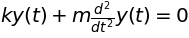

Generic solution:


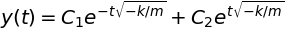

Solution with initial conditions:


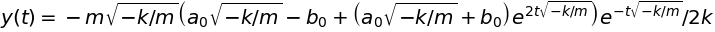

In [278]:
#https://stackoverflow.com/questions/34735660/sympy-second-order-ode
from IPython.display import display
import sympy as sy

sy.init_printing()  # LaTeX-like pretty printing for IPython

t = sy.Symbol("t", real=True)
m, k = sy.symbols('m k', real=True)  # gives C_1 Exp() + C_2 Exp() solution
# m, k = sy.symbols('m k', positive=True)  # gives C_1 sin() + C_2 cos() sol.
a0, b0 = sy.symbols('a0, b0', real=True)
y = sy.Function('y')

Eq1 = sy.Eq(m*sy.diff(y(t), t, 2) + k*y(t))
print("ODE:")
display(Eq1)

print("Generic solution:")
y_sl0 = sy.dsolve(Eq1, y(t)).rhs  # take only right hand side
display(sy.Eq(y(t), y_sl0))

# Initial conditions:
cnd0 = sy.Eq(y_sl0.subs(t, 0), a0)  # y(0) = a0
cnd1 = sy.Eq(y_sl0.diff(t).subs(t, 0), b0)  # y'(0) = b0

#  Solve for C1, C2:
C1, C2 = sy.symbols("C1, C2")  # generic constants
C1C2_sl = sy.solve([cnd0, cnd1], (C1, C2))

# Substitute back into solution:
y_sl1 = sy.simplify(y_sl0.subs(C1C2_sl))
print("Solution with initial conditions:")
display(sy.Eq(y(t), y_sl1))

We can then substitute in values for x. 

In [206]:
print(A_sol.subs(x,4))



Eq(f(4), (C1 + exp(4)*sin(4)/2 - exp(4)*cos(4)/2)*exp(-4))


In [227]:
B = [A_sol.subs(x, X) for X in [0, 0.5, 1]]# multiple values
print(B[0])
print(B[1])
print(B[2])


Eq(f(0), C1)
Eq(f(0.5), C1 + 0.5*C2 - 0.479425538604203)
Eq(f(1), C1 + C2 - sin(1))


An example of a second order derivative:

So we can write the equation:

$$A=f''(x)=sin(x)$$

In [228]:
A = Eq(f(x).diff(x,x), sin(x))


...and find the general solution where `C1` and `C2` are constants of integration.

In [275]:
A_sol = dsolve(A, f(x))
pprint(A_sol)



f(x) = C₁ + sin(x)


Eq(f(x), C1 + sin(x))

## Numerial Solutions to  Ordinary Differential Equations

The function `scipy.integrate.odeint` solves first order differential equations.

In contrast to `dsolve`, this gives the numerical solution for a range of input values, rather than the symbolic expression.

In [263]:
from scipy.integrate import odeint

The function `odeint` takes a user-defined function as an argument.

This input function should define the derivative you want to solve in the form: 

$f' = \frac{df}{dt} = g(t)$

For example:

$f' = cos(t), \quad f(t=0)=0$

In [264]:
def dfdt(x, t):
    return np.cos(t)


Two additional arguments are needed:
- the value(s) of t at which to evaluate x, starting with the initial value
- the initial value of x
- (if `dx_dt` takes any other argumemts they are entered as a tuple as the third argument)

In [265]:
ts = np.linspace(0,5,100) # the value(s) of t at which to evaluate x
f0 = 0                    # the initial value

# odeint returns x at each value of t
fs = odeint(dfdt, # function
            f0,   # initial value
            ts)   # time span


The function `odeint` returns an $n\times 1$ array (2D column).

To plot the output we have to "flatten" it to a 1D array.

Recall, $f' = cos(t), \quad f = sin(t)$

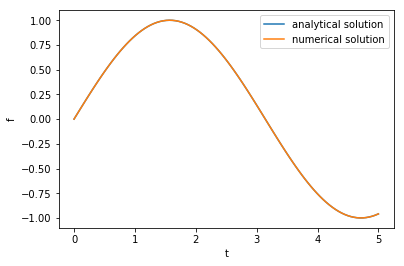

In [267]:
fs = np.array(fs).flatten()

# plot the function  
plt.xlabel("t")
plt.ylabel("f")
plt.plot(ts, np.sin(ts), label='analytical solution');
plt.plot(ts, fs, label='numerical solution');
plt.legend(loc='best')



The numerical and analytical solutions agree.

We can then obtain the equation of the line using sympy.

In [243]:
from sympy import cos
f = Function('f')
x = Symbol('x')

A = Eq(f(x).diff(x), cos(x))
A_sol = dsolve(A, f(x))
pprint(A_sol)

f(x) = C₁ + sin(x)


There is one unknown constant of integration.

We can find this by substituting the initial condition using the method `subs`:


In [ ]:
constants = solve((A_sol.subs(x,0)-x0, 
                   A_sol.diff(t).subs(t,0)-v0))


display(constants)

Let's take another example.

The derivative of the natural exponential function:

$f(x)=e^x, \quad f'(x)=f(x)=e^x$

In [253]:
def fprime(y,t):
    return y

y = 3 at x = 1.098547805640928


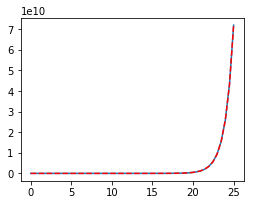

In [261]:
tspan = np.linspace(0, 25)
y0 = 1 

ysol = odeint(fprime, y0, tspan)

plt.figure(figsize=(4,3))
plt.plot(tspan, ysol, label='numerical solution')
plt.plot(tspan, np.exp(tspan), 'r--', label='analytical solution')



tspan = np.linspace(0, 2)
y0=1
ysol = odeint(fprime, y0, tspan)

from scipy.interpolate import interp1d
ip = interp1d(ysol[:,0], tspan) # reverse interpolation
ip = interp1d(ysol[:,0], tspan) # reverse interpolation
print(f'y = 3 at x = {ip(3)}')

#x_int = np.arange(x[0], x[-1]+interval, interval)



# function data
# plt.plot(x_int, np.exp(x_int), 'k--', label='y = exp(x)')

# # interpolated data
# func = interp1d(x, y)
# plt.plot(x_int, func(x_int), 'g--', label='linear interpolation')

Now, suppose you want to know the value of $t$ where $y=3$? 

There are several approaches to this:
- ode solver
- event like approach to stop integration at f=3
- reverse interpolation. 

We simply reverse the x and y vectors so that y is the independent variable, and we interpolate the corresponding x-value.